# Monte Carlo Methods

Partly based on material of Elizaveta Semenova, Applied Machine Learning Days 2020, Bayesian Inference: embracing uncertainty.

## What are Monte Carlo Methods?

Monte Carlo Methods are a class of algorithms that infer quantities by using random number generators.

Monte Carlo Methods are probabilistic and not deterministic. This is, Monte Carlo Methods usually don't yield the same excat results when being repeating. They are statistical methods, which estimate quantities - or parameters - rather than determining them.

In this Notebook, two examples of Monte Carlo Methods are discussed

 * Monte Carlo Integration of $\int_{0}^{1}e^{x}dx$
 * Parameter Estimation in Probabilistical Graphical Models
 


## Monte Carlo Integration
 
Monte Carlo Integration is one form of Numerical Integration. Numerical Integration calculates integrals $$ \int_{a}^{b}f(x)dx$$ of Riemann-integrable functions computationally instead of determining them analytically. This is useful because finding closed-form solutions for integrals is often difficult. Numerical Integration generally computes integrals by approximating the function, which is to be integrated, by a step function. Monte Carlo Integration, on the other hand, estimates this integral by estimaing the fraction of random points that fall below $f(x)$. Monte Carlo Integration scales better to integration in high-dimensional spaces compared to Numerical Integration that is based on a step function aproach, which suffers heavily from the curse of dimensionality.


### Example

Determine the integral $\int_0^1 e^x dx$.

Analytically, this can be calculated by $e^1 - e^0 = e - 1$ 

In [2]:
exp(1) - exp(0)

1.718281828459045

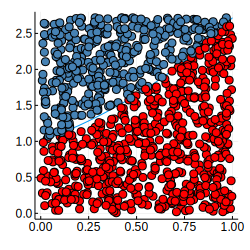

In [10]:
# Monte Carlo Integration - Visualization

using Distributions
using Plots

x = range(0, stop = 1, length = 1000)
plot(x, exp.(x), size= [200,200], legend= false)

pts =  rand(Uniform(0,1), (1000, 2)) # sample uniformly in the square
pts[:, 2] *= exp(1)

cols = fill(:red, 1000)

for i in range(1, step=1, stop=1000)
    if pts[i,2] > exp(pts[i,1])     # acceptance / rejection step
        cols[i] = :steelblue
    end
end

scatter!(pts[:, 1], pts[:, 2], color = cols, size=[250, 250], legend = false, xlim = [0,1], ylim = [0, exp(1)])

In [6]:
# Monte Carlo Integration - Estimation

for n in 10 .^[1, 2, 3, 4, 5, 6, 7]
    pts =  rand(Uniform(0,1), (n, 2))
    pts[:, 2] *= exp(1)
    count = sum(pts[:, 2] .< exp.(pts[:, 1]))
    volume = exp(1) * 1 # volume of region
    sol = (volume * count)/n    
    println(sol)
end

2.174625462767236
1.7397003702137888
1.7097992701007392
1.733991978374025
1.7176822874032707
1.7174050226567679
1.7178910514476962


## Bayes' Theorem example 1: diagnosing flu

Find probability of a patient having a flue given they have high temperature. 

A = to have a flu

B = to have high fever

$$P(\text{flu} \vert \text{fever})= P(\text{fever} \vert \text{flu}) \frac{P(\text{flu})}{P(\text{fever})}$$

We know that the probability of having fever this time of the year is 10%, probability of having a flue this time of the year is 7%, and among all people having a flu, 70% of them have fever.

$$ 70\% * 7\% / 10\% = 49\%.$$

In practice, we usually want to estimate the unknown model parameters 
$$\theta = (\theta_1, ..., \theta_k),$$ given
the observed data $$y = (y_1, ..., y_n)$$
by using the Bayes' rule:
$$P(\theta \vert y) =  \frac{P(y \vert \theta) P(\theta)}{P(y)}.$$

In continuous case, we speak of probability densities $p(.)$.

The **posterior distribution** is being formed as
<br>
<br>
$$p(\theta \vert y) \propto p(y \vert \theta) p(\theta).$$

- $p(\theta)$ is the **prioir** and expresses our beliefs about $\theta$

- $p(y \vert \theta)$ is the **likelihood** of data $y$ as a function of $\theta$

- we dropped $p(y)$ because the average likelihood across all parameter values
$$p(y) = \int_{\theta_1} ... \int_{\theta_k} p(\theta) p(y \vert \theta) d\theta_1 ... d\theta_k = E_{\theta}[p(y \vert \theta)]$$
does not depend on $\theta$  (hence will not influence the inference) and is very hard to compute.

## Components of the Bayesian model
<br>

- Likelihood

- Prior

- Posterior

$$\text{Posterior} = \frac{\text{Likelihood × Prior}}{\text{Average Likelihood}} \propto \text{Likelihood × Prior}$$

## Frequetist vs Bayesian approaches
**Frequentist:**
- probability  is a long-run frequency
- parameters are fixed
- parameters are estimated using the current data.

**Bayesian:**
- probability represents one's uncertainty
- parameters are described by distributions (i.e. reflecting uncertainty)
- estimation is based on our belief and/or prior knowledge about parameters and the current data.